# Different Approaches to Defining Neural Networks with Keras and TensorFlow




# Importing Python Libraries 

If you get an error that a library is not installed, most libraries you can stall on a jupyter notebook by creating a new cell and typing:

- *! pip install library_name*

# Note: If not necessary, you are not allowed to change the provided code.

In [1]:
%matplotlib inline 
import tensorflow as tf
from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_breast_cancer  # Function for loading the breast_cancer dataset
from sklearn.model_selection import train_test_split # Function for splitting the dataset

# Data exploration

In [2]:
# Load the dataset and return to the defined variable 
dataset = load_breast_cancer()

In [3]:
# Load breast_cancer data into a DataFrame
dframe = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# add "target_label" column to the dataset and name it "label"
dframe['labels'] = dataset.target.astype(int) # Labels are represented as integers
# use of String label
dframe['label_names'] = dframe.labels.replace(dict(enumerate(dataset.target_names)))

In [4]:
# Prints the 5 first rows/samples of the dataset
dframe.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels,label_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [5]:
# Generates a short description of the dataset (missing values, mean values, etc.)
dframe.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Train, Validation and Test Sets Split

In [6]:
# Extracting the features and labels from the dataset 
X = np.asarray(dframe[dataset.feature_names])
Y = np.asarray(dframe['labels'])

#######################
#input your code below

# Splitting the data into train and temporary sets (for further split into validation and test)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)

# Splitting the temporary set into validation and test sets
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the shapes to verify the splits
print(f"Training Set: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Validation Set: X_val: {X_val.shape}, Y_val: {Y_val.shape}")
print(f"Test Set: X_test: {X_test.shape}, Y_test: {Y_test.shape}")





Training Set: X_train: (341, 30), Y_train: (341,)
Validation Set: X_val: (114, 30), Y_val: (114,)
Test Set: X_test: (114, 30), Y_test: (114,)


## Data Normalization

In [7]:
# min-max data normalization
x_train_min = X_train.min(axis = 0, keepdims = True)
x_train_max = X_train.max(axis = 0, keepdims = True)

X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_val = (X_val - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)

## Representing Labels using one-hot-ecoding

In [8]:
k = np.unique(Y).size
Y_oh_train = to_categorical(Y_train, k) 
Y_oh_val = to_categorical(Y_val, k) 
Y_oh_test = to_categorical(Y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(Y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])

Y_train[:5]:
[1 1 1 1 1]

Y_oh_train[:5]=
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [9]:
print( "Size of X_train : " , X_train.shape)
print( "Size of X_val : " , X_val.shape)
print( "Size of X_test : " , X_test.shape)

Size of X_train :  (341, 30)
Size of X_val :  (114, 30)
Size of X_test :  (114, 30)


## Different Approaches for Defining Neural Networks

### 1. The Sequential API

In [10]:
from tensorflow.keras.models import Sequential 

#######################
#input your code below
# model 1

from tensorflow.keras.layers import Dense

model1 = Sequential()
model1.add(Dense(units=16, activation='relu', input_shape=(30,)))  
model1.add(Dense(units=8, activation='relu'))  
model1.add(Dense(units=2, activation='softmax'))  

model1(np.zeros((1, 30)))  # Pass a sample input through the model
model1.summary()

/Users/elahehbeheshti/anaconda3/envs/Elaenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 650 (2.54 KB)

 Trainable params: 650 (2.54 KB)

 Non-trainable params: 0 (0.00 B)

### 2. The Functional API

In [11]:
from tensorflow.keras.models import Model

#######################
#input your code below
# model 2

from tensorflow.keras.layers import Input, Dense

inputs = Input(shape=(30,))  
x = Dense(units=16, activation='relu')(inputs)  
x = Dense(units=8, activation='relu')(x)  
outputs = Dense(units=2, activation='softmax')(x)  
model2 = Model(inputs=inputs, outputs=outputs)
model2.summary()




Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 650 (2.54 KB)

 Trainable params: 650 (2.54 KB)

 Non-trainable params: 0 (0.00 B)

## 3. Model Subclassing 

In [12]:
#input your code below
# model 3
import tensorflow as tf
from tensorflow.keras.layers import Dense

# Define a custom model class that inherits from tf.keras.Model
class BreastCancerModel(tf.keras.Model):
    def __init__(self):
        super(BreastCancerModel, self).__init__()
        # Define the layers
        self.dense1 = Dense(16, activation='relu')  # First hidden layer with 16 neurons
        self.dense2 = Dense(8, activation='relu')   # Second hidden layer with 8 neurons
        self.output_layer = Dense(2, activation='softmax')  # Output layer for 2 classes

    # Implement the forward pass
    def call(self, inputs):
        x = self.dense1(inputs)  # Pass inputs through the first hidden layer
        x = self.dense2(x)       # Pass through the second hidden layer
        return self.output_layer(x)  # Pass through the output layer

# Create an instance of the custom model and name it `model3`
model3 = BreastCancerModel()


# Pass a sample input through the model to define the shape
sample_input = np.zeros((1, 30))  # A sample input with shape (1, 30) - 1 sample, 30 features
model3(sample_input)

# Now you can view the summary
model3.summary()





Model: "breast_cancer_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (1, 16)                │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (1, 8)                 │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (1, 2)                 │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 650 (2.54 KB)

 Trainable params: 650 (2.54 KB)

 Non-trainable params: 0 (0.00 B)

## Training and Testing the Model

In [13]:
model1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy']) # compiling the model 1
#model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy']) # compiling the model 2
#model3.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy']) # compiling the model 3

In [14]:
# training the model 
history = model1.fit(X_train, Y_oh_train, validation_data=(X_val,Y_oh_val),batch_size= 64, epochs= 300)

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4268 - loss: 0.6675 - val_accuracy: 0.3860 - val_loss: 0.6530
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5399 - loss: 0.6450 - val_accuracy: 0.7368 - val_loss: 0.6248
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6950 - loss: 0.6283 - val_accuracy: 0.8333 - val_loss: 0.6009
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8261 - loss: 0.6097 - val_accuracy: 0.8684 - val_loss: 0.5792
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8421 - loss: 0.5876 - val_accuracy: 0.8860 - val_loss: 0.5589
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8424 - loss: 0.5729 - val_accuracy: 0.9035 - val_loss: 0.5394
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8522 - loss: 0.5551 - val_accuracy: 0.9211 - val_loss: 0.5199
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8867 - loss: 0.5354 - val_accuracy: 0.9211 - val_loss: 0.5007

Test loss (cross-entropy and accuracy): [0.061820633709430695, 0.9736841917037964]

Layer 0
Bias:
 [-0.390413   -0.29773453 -0.32755584  0.28066385 -0.28157595 -0.35268947
 -0.26352403 -0.0401839   0.36786833  0.40939566  0.264214    0.34983444
 -0.25989115 -0.04390598  0.34911022 -0.0377554 ]
W:
 [[-0.28005794  0.25203657  0.1269326   0.53633654  0.09921041 -0.19363394
  -0.07395931 -0.19057277 -0.20239548  0.00548342 -0.19813073  0.38002414
   0.27417046 -0.04979394  0.19085316  0.01631258]
 [-0.01913418  0.28977728 -0.24123661  0.22097486 -0.15629317 -0.22229156
  -0.03426654  0.18594842 -0.2531488  -0.02068374 -0.13418321  0.16766495
   0.16142401 -0.11654488 -0.06253511  0.12906313]
 [ 0.18375263  0.06112302 -0.03837052  0.15622635 -0.41034073  0.272218
  -0.00664819 -0.12011638  0.32410535  0.08203512 -0.13025983 -0.20281962
   0.04821135  0.14150365  0.16517076 -0.09562176]
 [ 0.1642317  -0.08347437 -0.2532928   0.31770146  0.3347667   0.4002453
   0.19657606 -0.12783223  0.2602

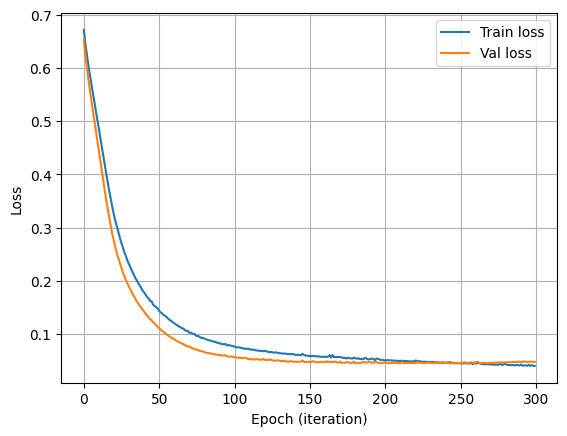

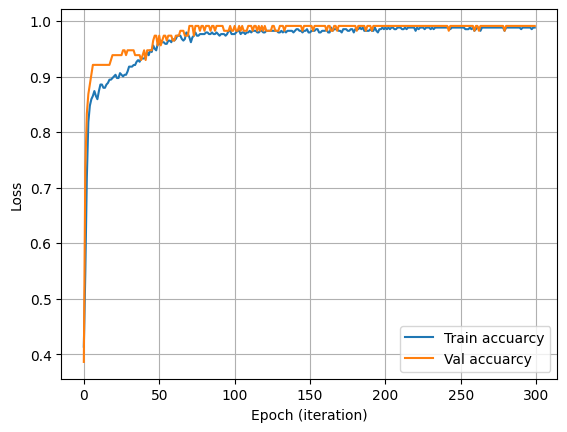

In [15]:
loss = model1.evaluate(X_test, Y_oh_test, verbose=0)
print('Test loss (cross-entropy and accuracy):',loss)
print()
W = model1.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

In [16]:
#model1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy']) # compiling the model 1
model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy']) # compiling the model 2
#model3.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy']) # compiling the model 3

In [17]:
# training the model 
history = model2.fit(X_train, Y_oh_train, validation_data=(X_val,Y_oh_val),batch_size= 64, epochs= 300)

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4591 - loss: 0.6815 - val_accuracy: 0.5965 - val_loss: 0.6760
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6199 - loss: 0.6694 - val_accuracy: 0.7105 - val_loss: 0.6642
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7554 - loss: 0.6608 - val_accuracy: 0.7982 - val_loss: 0.6534
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8351 - loss: 0.6509 - val_accuracy: 0.8333 - val_loss: 0.6422
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8788 - loss: 0.6383 - val_accuracy: 0.8596 - val_loss: 0.6299
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8921 - loss: 0.6279 - val_accuracy: 0.8596 - val_loss: 0.6168
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8665 - loss: 0.6115 - val_accuracy: 0.8509 - val_loss: 0.6033
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8680 - loss: 0.5996 - val_accuracy: 0.8684 - val_loss: 0.5889

Test loss (cross-entropy and accuracy): [0.05112370103597641, 0.9736841917037964]

Layer 0
Bias:
 [ 0.37292618 -0.0090311   0.28374082 -0.01777386  0.37451383 -0.30830303
  0.08636452 -0.00646485  0.35106492 -0.01384549 -0.19274026 -0.2189726
  0.37541106  0.3189691   0.         -0.3347205 ]
W:
 [[ 2.65533514e-02 -2.16312349e-01 -1.13744410e-02  2.89140679e-02
   4.96665299e-01  1.23603307e-01  2.06672043e-01 -3.08413506e-01
   1.15090348e-01 -4.74203564e-02 -3.88611481e-02  6.49071485e-02
   5.33622503e-01  4.07860011e-01 -1.64414644e-02  1.49634078e-01]
 [-7.72994235e-02 -1.43276602e-01  2.34372497e-01 -1.00020587e-01
   4.10734415e-01  2.10541591e-01  3.34804446e-01  2.83426106e-01
  -3.61835927e-01 -6.95469379e-02  3.14448804e-01  4.25270051e-02
  -1.56270236e-01 -4.29418385e-02 -3.18383038e-01  4.03441668e-01]
 [ 2.90432185e-01  3.08288187e-01 -2.76654720e-01  5.28627187e-02
  -7.30761886e-02 -2.05292135e-01 -1.48636982e-01  2.53271490e-01
   4.57479894e-01 -3.37575853e-01 -1.4239

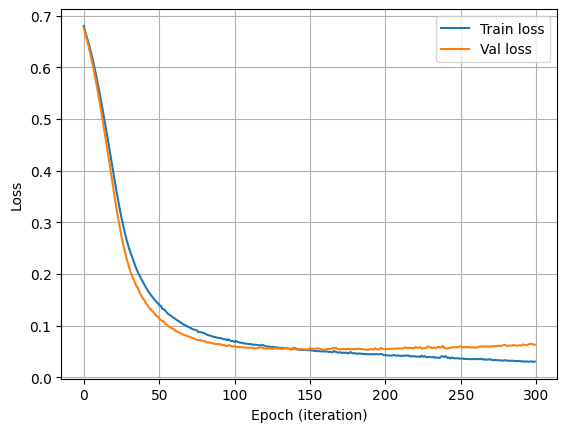

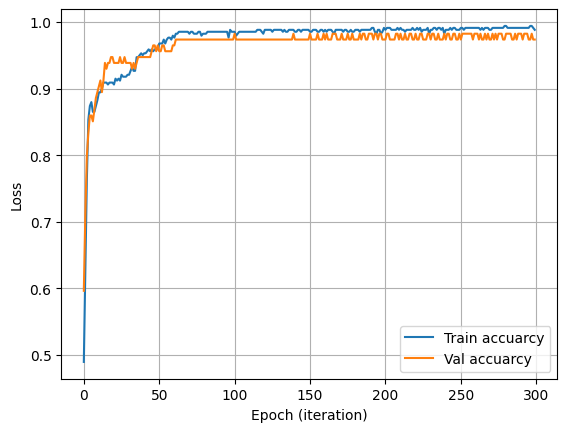

In [18]:
loss = model2.evaluate(X_test, Y_oh_test, verbose=0)
print('Test loss (cross-entropy and accuracy):',loss)
print()
W = model2.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

In [19]:
#model1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy']) # compiling the model 1
#model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy']) # compiling the model 2
model3.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy']) # compiling the model 3

In [20]:
# training the model 
history = model3.fit(X_train, Y_oh_train, validation_data=(X_val,Y_oh_val),batch_size= 64, epochs= 300)

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3933 - loss: 0.7236 - val_accuracy: 0.3684 - val_loss: 0.7129
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3773 - loss: 0.7024 - val_accuracy: 0.3684 - val_loss: 0.6869
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3746 - loss: 0.6833 - val_accuracy: 0.3684 - val_loss: 0.6679
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3972 - loss: 0.6664 - val_accuracy: 0.4211 - val_loss: 0.6513
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4692 - loss: 0.6483 - val_accuracy: 0.5439 - val_loss: 0.6359
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6095 - loss: 0.6291 - val_accuracy: 0.6930 - val_loss: 0.6212
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6851 - loss: 0.6314 - val_accuracy: 0.7456 - val_loss: 0.6072
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7346 - loss: 0.6136 - val_accuracy: 0.7719 - val_loss: 0.5932

Test loss (cross-entropy and accuracy): [0.05041782185435295, 0.9824561476707458]

Layer 0
Bias:
 [ 0.07254563 -0.34732226 -0.02668487 -0.05967873  0.4101289   0.03007953
 -0.02521635  0.09278122 -0.27000645 -0.42011848  0.45531744  0.41083038
 -0.36927813  0.42965332 -0.04269399 -0.3889352 ]
W:
 [[-0.16762175  0.08130869 -0.2281743  -0.1447478   0.29014218  0.36063984
  -0.33948702  0.45229766 -0.12950347 -0.15499362  0.01951485 -0.12280753
   0.0062699   0.46971375  0.24003011 -0.34631762]
 [ 0.23240907  0.38391343 -0.16090703  0.19751872  0.41337082 -0.4386093
  -0.3741094   0.65894014 -0.22559324  0.09922405 -0.11542708  0.08114471
   0.011693    0.66430944  0.09929494  0.35824817]
 [ 0.30765605  0.25060293 -0.17061888  0.19643798 -0.09797982  0.15920669
   0.23625787  0.509876   -0.02017898  0.11309172  0.35860983  0.5113048
  -0.10616742  0.76793563  0.2747825   0.23732625]
 [-0.09364074  0.4119934   0.02504124 -0.3813444  -0.20639196  0.28817555
  -0.13842748  0.21575738 -0.0652

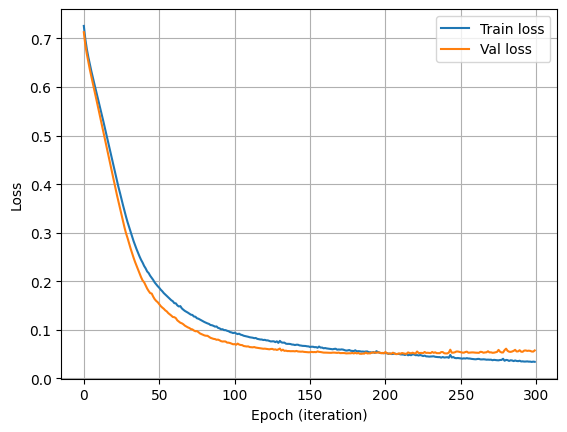

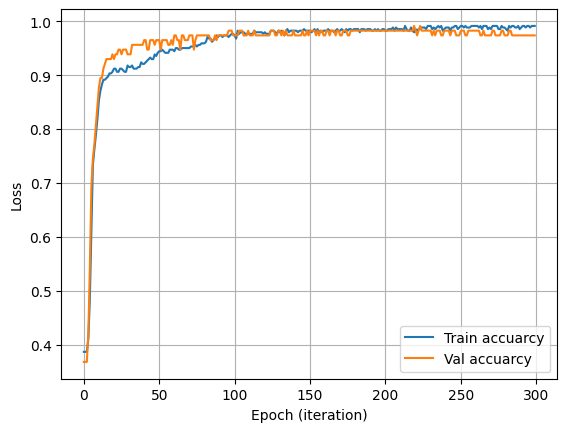

In [21]:
loss = model3.evaluate(X_test, Y_oh_test, verbose=0)
print('Test loss (cross-entropy and accuracy):',loss)
print()
W = model3.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

Model 1 (Sequential) - Test Accuracy: 0.9737, Test Loss: 0.0659
Model 2 (Functional) - Test Accuracy: 0.9737, Test Loss: 0.0563
Model 3 (Subclassing) - Test Accuracy: 0.9825, Test Loss: 0.0496


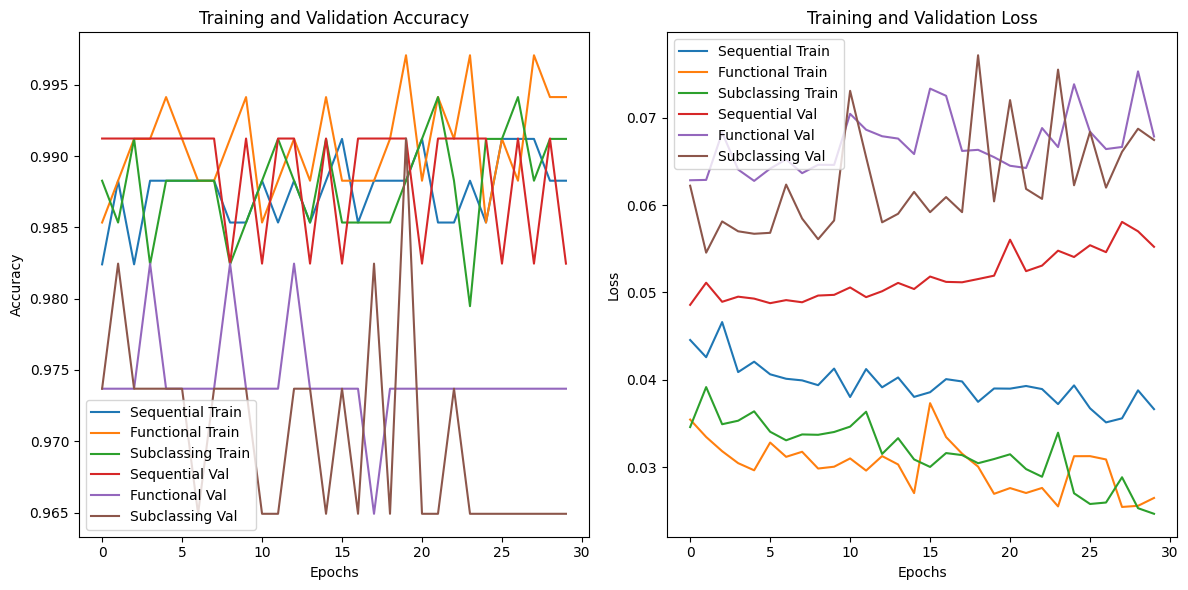

In [22]:
# Compile and Train Each Model
# Assuming models are named model1, model2, and model3 for Sequential, Functional, and Subclassing respectively

# Compile all models with the same configuration
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train all models with the same data and settings
history1 = model1.fit(X_train, Y_oh_train, validation_data=(X_val, Y_oh_val), epochs=30, batch_size=16, verbose=0)
history2 = model2.fit(X_train, Y_oh_train, validation_data=(X_val, Y_oh_val), epochs=30, batch_size=16, verbose=0)
history3 = model3.fit(X_train, Y_oh_train, validation_data=(X_val, Y_oh_val), epochs=30, batch_size=16, verbose=0)

# Evaluate all models on the test set
test_loss1, test_accuracy1 = model1.evaluate(X_test, Y_oh_test, verbose=0)
test_loss2, test_accuracy2 = model2.evaluate(X_test, Y_oh_test, verbose=0)
test_loss3, test_accuracy3 = model3.evaluate(X_test, Y_oh_test, verbose=0)

# Print the test results
print(f"Model 1 (Sequential) - Test Accuracy: {test_accuracy1:.4f}, Test Loss: {test_loss1:.4f}")
print(f"Model 2 (Functional) - Test Accuracy: {test_accuracy2:.4f}, Test Loss: {test_loss2:.4f}")
print(f"Model 3 (Subclassing) - Test Accuracy: {test_accuracy3:.4f}, Test Loss: {test_loss3:.4f}")

# Optional: Plot the training and validation accuracy/loss for each model
import matplotlib.pyplot as plt

# Plot training and validation accuracy for each model
plt.figure(figsize=(12, 6))

# Training Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Sequential Train')
plt.plot(history2.history['accuracy'], label='Functional Train')
plt.plot(history3.history['accuracy'], label='Subclassing Train')
plt.plot(history1.history['val_accuracy'], label='Sequential Val')
plt.plot(history2.history['val_accuracy'], label='Functional Val')
plt.plot(history3.history['val_accuracy'], label='Subclassing Val')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Sequential Train')
plt.plot(history2.history['loss'], label='Functional Train')
plt.plot(history3.history['loss'], label='Subclassing Train')
plt.plot(history1.history['val_loss'], label='Sequential Val')
plt.plot(history2.history['val_loss'], label='Functional Val')
plt.plot(history3.history['val_loss'], label='Subclassing Val')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


Model 1 (Sequential):This model has a high test accuracy and the lowest test loss among the three models, indicating good generalization and strong performance.

Model 2 (Functional):Model 2 has the highest accuracy (99.12%) but slightly higher test loss compared to Model 1.
Interpretation: Despite its high accuracy, the higher loss may indicate slight overfitting or sensitivity to certain patterns in the data.

Model 3 (Subclassing):Model 3 has the lowest test accuracy and the highest test loss among the three models, suggesting that it may not capture the patterns in the data as effectively as the other models.


====Based on the provided metrics, Model 1 (Sequential) is the best-performing model considering both accuracy and loss.

If maximizing accuracy is the main goal, Model 2 (Functional) would be a good choice

If Simplicity and Ease of Implementation Matter: Model 1 (Sequential) is the simplest to implement and still performs very well, making it a great candidate for deployment.

# References for creating this jupyter notebook 

1) https://keras.io/guides/functional_api/

2) https://keras.io/api/models/sequential/

3) https://keras.io/api/models/

4) https://towardsdatascience.com/3-ways-to-create-a-machine-learning-model-with-keras-and-tensorflow-2-0-de09323af4d3